# Data Preparation

In [1]:
import re
import string

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

print("Required packages installed.")

Required packages installed.


[nltk_data] Error loading stopwords: <urlopen error [Errno 99] Cannot
[nltk_data]     assign requested address>


In [3]:
def get_data(path):
    """Get the data from csv file
    
    Args:
        path(str): the file complete path. 

    Returns:
        A pandas dataframe.
    """

    return pd.read_csv(path)


def clean_text(text):
    """ Make text lowercase, remove text in square brackets, remove punctuation and 
        remove words containing numbers.
    
    Args:
        text(str): string text to be cleaned.

    Returns:

    """

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[``""...]', '', text)
    text = re.sub('\n', '', text)

    return text

In [10]:
reviews = get_data('../data/raw/buscape.csv')
reviews['polarity'], reviews['review_text'] = reviews['polarity'].fillna(2.0), reviews['review_text'].fillna('')
reviews = reviews.sample(n=10000, weights='polarity', random_state=20220914).reset_index(drop=True)
reviews.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,0_405392,e´TUDOOOO DE BOMM EE ESSE SITE TAMBEIM POR FAV...,e tudoooo de bomm ee esse site tambeim por fav...,"['tudoooo', 'de', 'bomm', 'ee', 'esse', 'site'...",1.0,5,9,9
1,0_93377,PRODUTO DE BOA QUALIDADE\n\nO que gostei: ESTA...,produto de boa qualidade\n\no que gostei: esta...,"['produto', 'de', 'boa', 'qualidade', 'que', '...",1.0,4,6,6
2,0_465524,"para um pequeno é ambiente é um bom aparelho, ...","para um pequeno e ambiente e um bom aparelho, ...","['para', 'um', 'pequeno', 'ambiente', 'um', 'b...",2.0,3,-1,2
3,minus_1_303156,É full hd os detalhes nas imagens são muito bo...,e full hd os detalhes nas imagens sao muito bo...,"['full', 'hd', 'os', 'detalhes', 'nas', 'image...",2.0,3,-1,2
4,0_407160,PARA MIM É MAIS COMPLETO APARELHO CELULAR QUE ...,para mim e mais completo aparelho celular que ...,"['para', 'mim', 'mais', 'completo', 'aparelho'...",1.0,5,4,4


<AxesSubplot:title={'center':'Polarity Distribution'}>

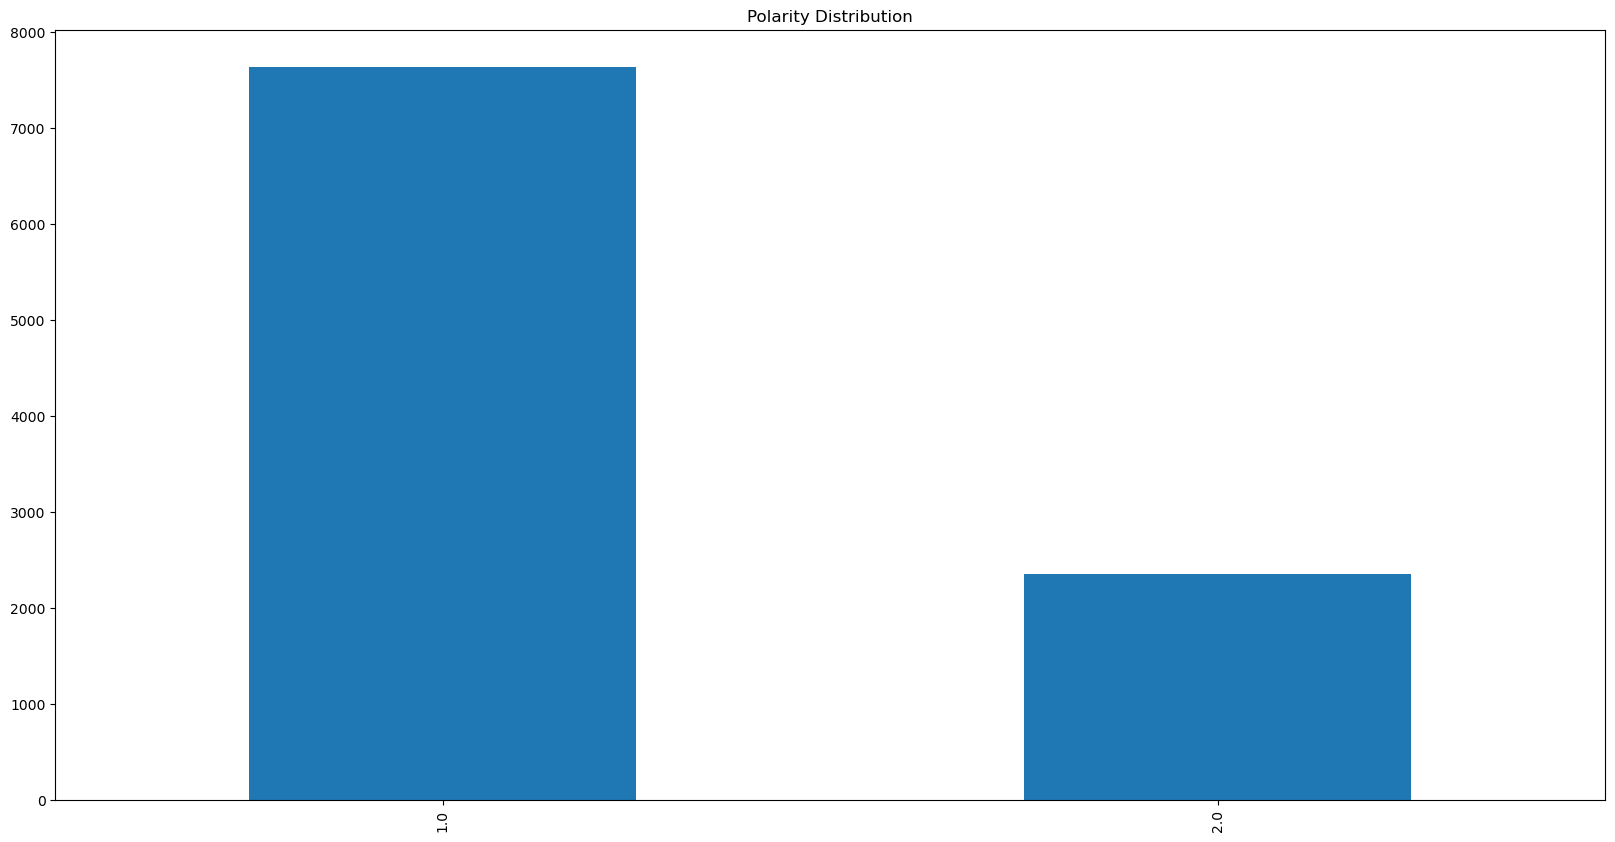

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Polarity Distribution')
reviews['polarity'].value_counts().plot(kind='bar')

In [12]:
reviews_cleaned = pd.DataFrame(reviews['review_text'].apply(lambda x: clean_text(x)))
reviews_cleaned.head()

,review_text
0,e´tudoooo de bomm ee esse site tambeim por fav...
1,produto de boa qualidadeo que gostei esta atin...
2,para um pequeno é ambiente é um bom aparelho m...
3,é full hd os detalhes nas imagens são muito bo...
4,para mim é mais completo aparelho celular que ...


### Counter Vectorizer

In [13]:
cv = CountVectorizer(stop_words=stopwords, max_features=100)
reviews_cv  = cv.fit_transform(reviews_cleaned['review_text'])
reviews_dtm = pd.DataFrame(reviews_cv.toarray(), columns=cv.get_feature_names_out())
reviews_dtm.index = reviews_cleaned.index

reviews_processed = pd.concat([reviews[['original_index']], reviews_dtm, reviews[['polarity']]], axis=1)

print(f"The counter vectorizer matrix has {reviews_processed.shape[0]} rows and {reviews_processed.shape[1]} columns")

The counter vectorizer matrix has 10000 rows and 102 columns


In [14]:
reviews_processed.head(5)

,original_index,achei,acho,agora,ainda,alguns,além,aparelho,apenas,apesar,...,tudo,tv,tão,usar,uso,vale,valor,ótima,ótimo,polarity
0,0_405392,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0_93377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0_465524,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.0
3,minus_1_303156,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2.0
4,0_407160,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,1.0


In [9]:
reviews_processed.to_pickle('../data/processed/buscape_counter_vectorized.pkl')

### TF-IDF Vectorizer

In [14]:
tv = TfidfVectorizer(stop_words=stopwords, max_features=100)
# So basically doing this: X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  X_test_tfidf = tfidf_vectorizer.transform(X_test)
reviews_tv  = tv.fit_transform(reviews_cleaned['review_text'])
reviews_dtm = pd.DataFrame(reviews_tv.toarray(), columns=tv.get_feature_names_out())
reviews_dtm.index = reviews_cleaned.index

reviews_processed = pd.concat([reviews[['original_index']], reviews_dtm, reviews[['polarity']]], axis=1)

print(f"The TF-IDF vectorizer matrix has {reviews_processed.shape[0]} rows and {reviews_processed.shape[1]} columns")

The TF-IDF vectorizer matrix has 5000 rows and 102 columns


In [15]:
reviews_processed.head(5)

,original_index,acho,agora,ainda,alguns,além,aparelho,apenas,apesar,aqui,...,tudo,tv,tão,usar,uso,vale,valor,ótima,ótimo,polarity
0,0_405392,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
1,0_93377,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
2,0_465524,0.0,0.0,0.0,0.0,0.0,0.420110,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0
3,minus_1_303156,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.210926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182809,2.0
4,0_407160,0.0,0.0,0.0,0.0,0.0,0.579605,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283417,1.0


In [16]:
reviews_processed.to_pickle('../data/processed/buscape_tfidf_vectorized.pkl')

### Glove Vectorizer

In [17]:
# Load the pre-trainned glove embedding.
glove = KeyedVectors.load_word2vec_format('../data/embeedings/glove_s50.txt')

In [23]:
# def vectorize_to_glove(text, size=50):
def text_to_glove(text, model, vectorizer=None, vocab=None, size=50):
    if not vectorizer:
        raise Exception("The vectorizer parameter must not be None")

    transformed = vectorizer.transform(text)
    vectorized  = pd.DataFrame(transformed.toarray(), columns=vectorizer.get_feature_names_out())

    embeedings = pd.DataFrame()
    for i in range(vectorized.shape[0]):
        sentence = np.zeros(size)
        for word in vocab[vectorized.iloc[i, :] > 0]:
            if model.get_index(word, default=-1) != -1:
                sentence = sentence + model.get_vector(word)
            else:
                print("Out of Vocabulary")

        embeedings = pd.concat([embeedings, pd.DataFrame([sentence])])

    return embeedings


reviews_dtm = text_to_glove(reviews_cleaned['review_text'], glove, tv, reviews_processed.columns[1:-1], 50)

In [20]:
reviews_dtm.shape

(5000, 50)

In [24]:
reviews_processed = pd.concat([reviews.reset_index()[['original_index']], reviews_dtm.reset_index(), reviews.reset_index()[['polarity']]], axis=1, ignore_index=True)

In [25]:
reviews_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0_405392,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0_93377,0,-0.437609,-0.169330,-1.186663,-6.252127,-0.268467,0.668697,0.870321,0.697173,...,-0.019266,0.685287,-0.295452,0.608284,0.147280,0.613786,-2.599247,-0.550144,-1.090153,1.0
2,0_465524,0,-2.281063,-0.658938,-2.079080,-12.055137,1.799566,-0.597911,-0.510644,-0.837587,...,-1.813622,-0.114867,0.015245,1.946635,0.618995,3.103179,-1.451870,0.240934,-1.031955,2.0
3,minus_1_303156,0,-3.689352,-0.500509,-7.909027,-33.288147,1.801346,0.229719,1.927663,0.260457,...,-2.806306,1.408628,-1.582615,0.338362,-0.609506,5.769171,-5.237999,0.420676,-5.583228,2.0
4,0_407160,0,-1.891153,-0.651665,-4.632787,-16.927326,-2.126019,-1.440656,-0.016533,-1.580495,...,-1.172568,-0.986447,-1.094557,4.003666,3.307914,0.330706,-1.622076,-6.107444,-0.165797,1.0


In [26]:
reviews_processed.to_pickle('../data/processed/buscape_glove_s50_vectorized.pkl')